# Crime data from 2010

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

## Data directory

In [3]:
year = '2010'

In [4]:
# data folder path
data_directory = os.path.join('..','data','crime_data/{}'.format(year))
data_directory_saves = os.path.join( '..','data','clean_data','crime/')
premise_dataset = os.path.join('..','data','crime_data/premise_codes.csv')

# combine all files into one

In [5]:
# combine all files into one df
all_files = glob.glob(os.path.join(data_directory, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

WARNING *** file size (2752234) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136263 entries, 0 to 136262
Data columns (total 12 columns):
# Of Offenses    136262 non-null float64
Beat             136262 non-null object
Block Range      136262 non-null object
Date             136262 non-null datetime64[ns]
Field11          0 non-null float64
Hour             136262 non-null float64
Offense Type     136262 non-null object
Premise          136262 non-null object
Street Name      136262 non-null object
Suffix           136262 non-null object
Type             136262 non-null object
Unnamed: 1       0 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 12.5+ MB


In [7]:
df.head(2)

,# Of Offenses,Beat,Block Range,Date,Field11,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,1.0,13D20,6600-6699,2010-04-17,NaN,0.0,Murder,05W,HEFFERNAN,-,-,NaN
1,1.0,11H40,10100-10199,2010-04-08,NaN,20.0,Murder,20R,LUCORE,-,-,NaN


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

# Of Offenses         1
Beat                  1
Block Range           1
Date                  1
Field11          136263
Hour                  1
Offense Type          1
Premise               1
Street Name           1
Suffix                1
Type                  1
Unnamed: 1       136263
dtype: int64

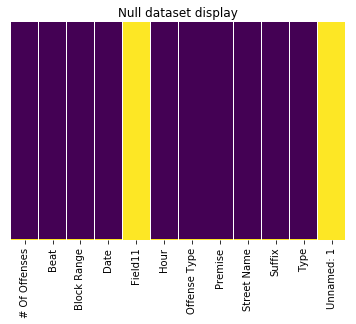

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()


## Cleanup
- lowercase column names
- joining similar columns
- renaming

In [10]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [11]:
df.head()

,# of offenses,beat,block range,date,field11,hour,offense type,premise,street name,suffix,type,unnamed: 1
0,1.0,13D20,6600-6699,2010-04-17,NaN,0.0,Murder,05W,HEFFERNAN,-,-,NaN
1,1.0,11H40,10100-10199,2010-04-08,NaN,20.0,Murder,20R,LUCORE,-,-,NaN
2,2.0,19G20,11400-11499,2010-04-01,NaN,22.0,Murder,13R,CARVEL,-,LN,NaN
3,1.0,10H60,3700-3799,2010-04-17,NaN,1.0,Murder,13R,WHEELER,-,-,NaN
4,1.0,14D30,5100-5199,2010-04-08,NaN,23.0,Murder,20R,MYRTLEWOOD,-,DR,NaN


In [12]:
df.rename(columns={
    '# of offenses': 'num_offenses',
     'offense type': 'offense_type',
    'block range': 'block_range',
    'street name': 'street_name'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136263 entries, 0 to 136262
Data columns (total 12 columns):
num_offenses    136262 non-null float64
beat            136262 non-null object
block_range     136262 non-null object
date            136262 non-null datetime64[ns]
field11         0 non-null float64
hour            136262 non-null float64
offense_type    136262 non-null object
premise         136262 non-null object
street_name     136262 non-null object
suffix          136262 non-null object
type            136262 non-null object
unnamed: 1      0 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 12.5+ MB


In [13]:
df.head()

,num_offenses,beat,block_range,date,field11,hour,offense_type,premise,street_name,suffix,type,unnamed: 1
0,1.0,13D20,6600-6699,2010-04-17,NaN,0.0,Murder,05W,HEFFERNAN,-,-,NaN
1,1.0,11H40,10100-10199,2010-04-08,NaN,20.0,Murder,20R,LUCORE,-,-,NaN
2,2.0,19G20,11400-11499,2010-04-01,NaN,22.0,Murder,13R,CARVEL,-,LN,NaN
3,1.0,10H60,3700-3799,2010-04-17,NaN,1.0,Murder,13R,WHEELER,-,-,NaN
4,1.0,14D30,5100-5199,2010-04-08,NaN,23.0,Murder,20R,MYRTLEWOOD,-,DR,NaN


## Drop columns

In [14]:
df.drop(['field11','suffix','unnamed: 1'],axis=1, inplace=True)

In [15]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,premise,street_name,type
0,1.0,13D20,6600-6699,2010-04-17,0.0,Murder,05W,HEFFERNAN,-
1,1.0,11H40,10100-10199,2010-04-08,20.0,Murder,20R,LUCORE,-
2,2.0,19G20,11400-11499,2010-04-01,22.0,Murder,13R,CARVEL,LN
3,1.0,10H60,3700-3799,2010-04-17,1.0,Murder,13R,WHEELER,-
4,1.0,14D30,5100-5199,2010-04-08,23.0,Murder,20R,MYRTLEWOOD,DR


## Premise

In [16]:
premise_data = pd.read_csv(premise_dataset)
#premise_data.columns = map(str.lower, premise_data.columns)
premise_data.columns = ['premise','premise_description']
premise_data.head()

,premise,premise_description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [17]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,premise,street_name,type
0,1.0,13D20,6600-6699,2010-04-17,0.0,Murder,05W,HEFFERNAN,-
1,1.0,11H40,10100-10199,2010-04-08,20.0,Murder,20R,LUCORE,-
2,2.0,19G20,11400-11499,2010-04-01,22.0,Murder,13R,CARVEL,LN
3,1.0,10H60,3700-3799,2010-04-17,1.0,Murder,13R,WHEELER,-
4,1.0,14D30,5100-5199,2010-04-08,23.0,Murder,20R,MYRTLEWOOD,DR


In [18]:
df = pd.merge(df, premise_data, on='premise', how='outer')

In [19]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,premise,street_name,type,premise_description
0,1.0,13D20,6600-6699,2010-04-17,0.0,Murder,05W,HEFFERNAN,-,WAREHOUSE
1,1.0,14D20,3400-3499,2010-04-01,0.0,Burglary,05W,CORDER,ST,WAREHOUSE
2,1.0,6B40,10200-10299,2010-04-08,23.0,Burglary,05W,NORTH,FWY,WAREHOUSE
3,1.0,13D10,6100-6199,2010-04-23,19.0,Burglary,05W,SOUTH LP E,SER,WAREHOUSE
4,1.0,3B10,5900-5999,2010-04-06,17.0,Burglary,05W,CENTRALCREST,ST,WAREHOUSE


## Drop premise column

In [20]:
df.drop(['premise'],axis=1, inplace=True)

## Rename premise_description to premise

In [21]:
df.rename(columns={
    'premise_description': 'premise',
}, inplace=True)

In [22]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,street_name,type,premise
0,1.0,13D20,6600-6699,2010-04-17,0.0,Murder,HEFFERNAN,-,WAREHOUSE
1,1.0,14D20,3400-3499,2010-04-01,0.0,Burglary,CORDER,ST,WAREHOUSE
2,1.0,6B40,10200-10299,2010-04-08,23.0,Burglary,NORTH,FWY,WAREHOUSE
3,1.0,13D10,6100-6199,2010-04-23,19.0,Burglary,SOUTH LP E,SER,WAREHOUSE
4,1.0,3B10,5900-5999,2010-04-06,17.0,Burglary,CENTRALCREST,ST,WAREHOUSE


# Null values

In [23]:
df.apply(lambda x: sum(x.isnull()))

num_offenses     2
beat             2
block_range      2
date             2
hour             2
offense_type     2
street_name      2
type             2
premise         50
dtype: int64

In [24]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,num_offenses,beat,block_range,date,hour,offense_type,street_name,type,premise
135940,1.0,19G40,12400-12499,2010-10-13,0.0,Aggravated Assault,DAIRY ASHFORD,-,NaN
135941,1.0,15E10,8900-8999,2010-10-07,0.0,Aggravated Assault,CHIMNEY ROCK,RD,NaN
135942,1.0,20G30,3200-3299,2010-11-09,8.0,Auto Theft,DAIRY ASHFORD,-,NaN
135943,1.0,20G30,2700-2799,2010-10-17,15.0,Theft,KIRKWOOD,DR,NaN
136255,1.0,7C20,5700-5799,2010-06-25,11.0,Theft,LOCKWOOD,DR,NaN
136256,1.0,8C10,9600-9699,2010-06-24,11.0,Theft,HOMESTEAD,RD,NaN
136257,1.0,11H10,7500-7599,2010-09-04,22.0,Theft,HARRISBURG,BLVD,NaN
136259,1.0,17E40,12300-12399,2010-09-09,0.0,Theft,FAIRMEADOW,DR,NaN
136262,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
136263,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,VACANT JAIL/PRISON


### Drop rows with more than 3 null values

In [25]:
df.dropna(thresh=3,inplace=True)

In [26]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,num_offenses,beat,block_range,date,hour,offense_type,street_name,type,premise
135938,1.0,19G50,11700-11799,2010-03-05,0.0,Theft,WILCREST,DR,NaN
135939,1.0,9C40,800-899,2010-05-10,14.0,Theft,EVANSTON,ST,NaN
135940,1.0,19G40,12400-12499,2010-10-13,0.0,Aggravated Assault,DAIRY ASHFORD,-,NaN
135941,1.0,15E10,8900-8999,2010-10-07,0.0,Aggravated Assault,CHIMNEY ROCK,RD,NaN
135942,1.0,20G30,3200-3299,2010-11-09,8.0,Auto Theft,DAIRY ASHFORD,-,NaN
135943,1.0,20G30,2700-2799,2010-10-17,15.0,Theft,KIRKWOOD,DR,NaN
136255,1.0,7C20,5700-5799,2010-06-25,11.0,Theft,LOCKWOOD,DR,NaN
136256,1.0,8C10,9600-9699,2010-06-24,11.0,Theft,HOMESTEAD,RD,NaN
136257,1.0,11H10,7500-7599,2010-09-04,22.0,Theft,HARRISBURG,BLVD,NaN
136259,1.0,17E40,12300-12399,2010-09-09,0.0,Theft,FAIRMEADOW,DR,NaN


### Replace null values on premise_code to 'none'

In [27]:
df.premise.fillna('UNK',inplace=True)

In [28]:
df.apply(lambda x: sum(x.isnull()))

num_offenses    0
beat            0
block_range     0
date            0
hour            0
offense_type    0
street_name     0
type            0
premise         0
dtype: int64

# Inspect each column

## `num_offenses`

In [29]:
df.num_offenses.value_counts(dropna=False)

1.0     134987
2.0       1046
3.0        212
4.0          9
5.0          3
6.0          2
9.0          2
16.0         1
Name: num_offenses, dtype: int64

In [30]:
df.num_offenses.dtype

dtype('float64')

### Change the type from float to integer

In [31]:
df.num_offenses = df.num_offenses.astype('int')

In [32]:
df.num_offenses.dtype

dtype('int64')

In [33]:
df.num_offenses.value_counts(dropna=False)

1     134987
2       1046
3        212
4          9
5          3
9          2
6          2
16         1
Name: num_offenses, dtype: int64

## `beat`

In [34]:
len(df.beat.value_counts(dropna='False'))

122

In [35]:
df.beat.unique()

array(['13D20', '14D20', '6B40', '13D10', '3B10', '10H10', '3B30',
       '15E40', '3B50', '9C20', '10H70', '5F30', '9C10', '3B40', '4F30',
       '14D10', '5F20', '13D30', '7C10', '6B30', '10H30', '14D50', '6B20',
       '18F50', '2A60', '11H10', '19G50', '9C30', '7C20', '16E10',
       '11H50', '10H20', '2A40', '20G10', '6B60', '11H20', '14D30',
       '18F30', '20G30', '8C40', '13D40', '2A30', '18F10', '15E30',
       '16E30', '2A20', '7C50', '7C30', '17E20', '2A10', '17E30', '16E20',
       '15E20', '1A50', '5F10', '14D40', '4F20', '2A50', '19G40', '5F40',
       '18F60', '20G40', '17E10', '10H50', '20G50', '8C20', '20G70',
       '20G60', '7C40', '8C10', '6B10', '4F10', '18F40', '15E10', '12D40',
       '11H40', '19G30', '16E40', 'UNK', '9C40', '12D10', '8C60', '10H80',
       '8C50', '18F20', '17E40', '1A20', '24C10', '8C30', '11H30',
       '24C40', '12D50', '10H60', '12D20', '24C30', '12D70', '20G20',
       '20G80', '19G10', '19G20', '10H40', '6B50', '12D60', '1A30',
       '2

In [36]:
df.beat = df.beat.str.strip()

## `block_range`

In [37]:
len(df.block_range.unique())

249

In [38]:
df.block_range = df.block_range.str.strip()

In [39]:
len(df.block_range.unique())

249

## `date`

In [40]:
df['date'].dtype

dtype('<M8[ns]')

## `hour`

In [41]:
df.hour.value_counts(dropna=False)

18.0    8492
0.0     8491
22.0    8097
19.0    7870
17.0    7707
20.0    7662
12.0    7467
21.0    7288
15.0    6568
23.0    6480
16.0    6447
14.0    6065
13.0    5819
8.0     5496
11.0    5164
10.0    5138
9.0     4672
7.0     4596
1.0     3896
2.0     3332
6.0     2985
3.0     2636
5.0     1994
4.0     1900
Name: hour, dtype: int64

In [42]:
df.hour.dtype

dtype('float64')

## Change dtype 

In [43]:
df.hour = df.hour.astype('int')

In [44]:
df.hour.dtype

dtype('int64')

In [45]:
df.hour.value_counts(dropna=False)

18    8492
0     8491
22    8097
19    7870
17    7707
20    7662
12    7467
21    7288
15    6568
23    6480
16    6447
14    6065
13    5819
8     5496
11    5164
10    5138
9     4672
7     4596
1     3896
2     3332
6     2985
3     2636
5     1994
4     1900
Name: hour, dtype: int64

## `offense_type`

In [46]:
df.offense_type.value_counts(dropna=False)

Theft                 74581
Burglary              27924
Auto Theft            12424
Aggravated Assault    10915
Robbery                9449
Rape                    709
Murder                  260
Name: offense_type, dtype: int64

In [47]:
df.offense_type.unique()

array(['Murder', 'Burglary', 'Theft', 'Aggravated Assault', 'Robbery',
       'Auto Theft', 'Rape'], dtype=object)

## `street_name`

In [48]:
len(df.street_name.value_counts(dropna=False))

7832

In [49]:
df.street_name.value_counts(dropna=False)[:10]

WESTHEIMER          3716
GESSNER             2226
GULF                1931
RICHMOND            1683
SOUTHWEST           1515
NORTH               1457
KATY                1421
WEST SAM HOUSTON    1403
NORTHWEST           1291
BISSONNET           1272
Name: street_name, dtype: int64

In [50]:
df.street_name.unique()

array(['HEFFERNAN', 'CORDER', 'NORTH', ..., 'COMMUNITY COLLEGE',
       'BITTERCREEK', 'BENS VIEW'], dtype=object)

In [51]:
df.street_name = df.street_name.str.strip()  # no need

In [52]:
len(df.street_name.value_counts(dropna=False))

7832

## Organiaze columns

In [53]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,street_name,type,premise
0,1,13D20,6600-6699,2010-04-17,0,Murder,HEFFERNAN,-,WAREHOUSE
1,1,14D20,3400-3499,2010-04-01,0,Burglary,CORDER,ST,WAREHOUSE
2,1,6B40,10200-10299,2010-04-08,23,Burglary,NORTH,FWY,WAREHOUSE
3,1,13D10,6100-6199,2010-04-23,19,Burglary,SOUTH LP E,SER,WAREHOUSE
4,1,3B10,5900-5999,2010-04-06,17,Burglary,CENTRALCREST,ST,WAREHOUSE


In [54]:
# order that I want
cols = ['date','hour','beat','offense_type','block_range','street_name','premise','num_offenses','type']

In [55]:
df = df.reindex(columns=cols)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136262 entries, 0 to 136261
Data columns (total 9 columns):
date            136262 non-null datetime64[ns]
hour            136262 non-null int64
beat            136262 non-null object
offense_type    136262 non-null object
block_range     136262 non-null object
street_name     136262 non-null object
premise         136262 non-null object
num_offenses    136262 non-null int64
type            136262 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 10.4+ MB


In [57]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses,type
0,2010-04-17,0,13D20,Murder,6600-6699,HEFFERNAN,WAREHOUSE,1,-
1,2010-04-01,0,14D20,Burglary,3400-3499,CORDER,WAREHOUSE,1,ST
2,2010-04-08,23,6B40,Burglary,10200-10299,NORTH,WAREHOUSE,1,FWY
3,2010-04-23,19,13D10,Burglary,6100-6199,SOUTH LP E,WAREHOUSE,1,SER
4,2010-04-06,17,3B10,Burglary,5900-5999,CENTRALCREST,WAREHOUSE,1,ST


## Display Null values

In [58]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
beat            0
offense_type    0
block_range     0
street_name     0
premise         0
num_offenses    0
type            0
dtype: int64

## Save clean data

In [59]:
data_directory_saves

'../data/clean_data/crime/'

In [60]:
df.to_csv(data_directory_saves+'crime_2010.csv')